In [50]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [51]:
asset_returns =pd.read_csv(r'C:\Users\zayn-\Desktop\hassan work\interview-exercises-main\interview-exercises-main\quant_statistics\asset_returns_5y.csv')
specific_returns = pd.read_csv(r'C:\Users\zayn-\Desktop\hassan work\interview-exercises-main\interview-exercises-main\quant_statistics\specific_returns_5y.csv')

In [52]:
# Rename the 'Unnamed: 0' column to 'Dates' in the specific returns dataframe
specific_returns.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
# Ensure both dataframes have 'Dates' as their index
asset_returns.set_index('Dates', inplace=True)
specific_returns.set_index('Dates', inplace=True)
# Calculate predicted returns
predicted_returns = asset_returns.subtract(specific_returns)


In [53]:
predicted_returns= predicted_returns.dropna(axis=1)
predicted_returns

asset_returns= asset_returns.dropna(axis=1)
asset_returns

,AAPL US Equity,A UN Equity,AA US Equity,AAL UW Equity,AAP UN Equity,ABBV UN Equity,ADBE UW Equity,ADSK UW Equity,AIG UN Equity,AIV UN Equity,...,ACGL UW Equity,CSGP UW Equity,STR US Equity,INVH UN Equity,YELLQ UW Equity,PANW UW Equity,PODD UW Equity,VICI UN Equity,RVTY US Equity,FI US Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.114110,-2.623777,-1.279158,1.152288,0.292138,-3.210760,-0.738154,0.272141,0.532860,-3.486792,...,-1.983533,-0.776664,0.352941,-1.892429,6.666667,-2.728962,-7.425618,-1.597442,-2.075111,-1.741734
2019-01-03,-9.960739,-3.683970,0.000000,-7.450740,3.121833,-3.294856,-3.949771,-5.513337,-2.195860,0.873681,...,-1.565483,-2.222753,-1.641264,0.659894,1.488095,-1.915834,-1.348223,1.569263,-5.369215,-2.908184
2019-01-04,4.268935,3.461356,8.003050,6.586826,-2.480810,3.221694,4.863236,5.276980,3.690322,0.351115,...,2.366175,3.461868,2.502978,0.403430,4.985337,2.609905,6.501933,1.118811,4.258827,4.435886
2019-01-07,-0.222580,2.123435,0.282286,2.840202,1.467162,1.459527,1.357266,3.461179,0.572424,0.069972,...,-0.227359,0.959806,2.558140,-0.552487,8.100559,1.605294,-3.810758,0.263435,1.093689,-0.204862
2019-01-08,1.906307,1.465968,-0.598170,-1.608497,-0.695048,0.464756,1.491756,0.866486,0.395944,2.750587,...,0.379795,0.898028,-3.061227,1.919196,6.201550,1.643982,-0.080852,3.047818,2.672053,0.656904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-11,4.327095,0.582686,0.110528,1.565996,-4.311472,-0.893333,-0.603424,0.857705,-1.526819,0.365854,...,-0.954550,2.360728,0.441767,-0.745627,8.695652,1.017794,1.262612,0.320171,0.556070,-0.123553
2024-04-12,0.862660,-2.944828,-2.842948,-3.450808,-5.178211,-2.223256,-2.104155,-1.692525,-0.660644,-1.458080,...,-1.456576,-2.640371,-0.439824,-1.993643,4.000000,-1.687452,-2.465906,-0.921986,-4.617511,-1.556091
2024-04-15,-2.186349,-0.362396,3.892045,-1.596958,-0.595745,-0.375894,-0.841612,-3.105747,-0.855049,-1.726264,...,-0.244499,-3.110472,-2.730924,-1.061321,-3.846154,-2.479665,-0.730510,-1.288475,-1.130544,-1.990741


In [54]:
common_index = asset_returns.index.intersection(specific_returns.index)
asset_returns = asset_returns.loc[common_index]
specific_returns = specific_returns.loc[common_index]


WEEKLY/ MONTHLY PREDICTED AND ASSET RETURNS

In [55]:
predicted_returns.index = pd.to_datetime(predicted_returns.index)
asset_returns.index = pd.to_datetime(asset_returns.index)

In [56]:
predicted_returns.dropna(axis=1, inplace=True)
asset_returns.dropna(axis=1, inplace=True)

In [57]:
# Get the common columns between the two dataframes
common_columns = asset_returns.columns.intersection(specific_returns.columns)

In [58]:
common_columns

Index(['AAPL US Equity', 'A UN Equity', 'AA US Equity', 'AAL UW Equity',
       'AAP UN Equity', 'ABBV UN Equity', 'ADBE UW Equity', 'ADSK UW Equity',
       'AIG UN Equity', 'AIV UN Equity',
       ...
       'ACGL UW Equity', 'CSGP UW Equity', 'STR US Equity', 'INVH UN Equity',
       'YELLQ UW Equity', 'PANW UW Equity', 'PODD UW Equity', 'VICI UN Equity',
       'RVTY US Equity', 'FI US Equity'],
      dtype='object', length=579)

In [59]:
# Define thresholds and strategy parameters
buy_threshold = -1
sell_threshold = 1
stop_loss = -0.01
additional_sell_lower = -0.1
additional_sell_upper = 0.1
take_profit = 0.03
window_size = 80

# Initialize a DataFrame to store cumulative returns for each stock
cumulative_returns_df = pd.DataFrame(index=asset_returns.index)
z_scores_df = pd.DataFrame(index=asset_returns.index)

# Debugging: print column names
print("Asset Returns Columns:", asset_returns.columns)
print("Daily Predicted Returns Columns:", predicted_returns.columns)

# Simulate trades using the provided logic
for stock in predicted_returns.columns:
    # Calculate rolling mean for predicted and actual returns
    moving_average_predicted = predicted_returns[stock].rolling(window=window_size).mean()
    moving_average_actual = asset_returns[stock].rolling(window=window_size).mean()

    # Calculate the gap
    gap = moving_average_predicted - moving_average_actual
    
    # Calculate Z-scores
    z_score_gap = (gap - gap.mean()) / gap.std()

    # Identify outliers (z-score > 3 or < -3)
    outliers = (z_score_gap < -3) | (z_score_gap > 3)

    # Store Z-scores in the DataFrame
    z_scores_df[stock] = z_score_gap[~outliers]
    
    # Generate signals
    buy_signals = z_score_gap < buy_threshold
    sell_signals = z_score_gap > sell_threshold
    additional_sell_signals = (z_score_gap >= additional_sell_lower) & (z_score_gap <= additional_sell_upper)

    # Initialize positions and profit tracking
    position = 0
    strategy_returns = []
    entry_date = None

      # Simulate trades based on Z-scores with stop-loss and take-profit
    for i in range(len(z_score_gap)):
        current_date = z_score_gap.index[i]
        if position == 0:
            if buy_signals.iloc[i]:
                position = 1  # Buy signal
                entry_date = current_date
            elif sell_signals.iloc[i]:
                position = -1  # Sell signal
                entry_date = current_date
            strategy_returns.append(0)  # No return on the day of signal
        else:
            if entry_date is not None:
                trade_period = asset_returns[stock][entry_date:current_date]
                profit = trade_period.sum() * position
                if additional_sell_signals.iloc[i]:
                    # Sell 65% of the position
                    strategy_returns.append(asset_returns[stock].iloc[i] * position * 0.75)
                    position *= 0.25  # Reduce position by 65%
                else:
                    strategy_returns.append(asset_returns[stock].iloc[i] * position)
                if profit <= stop_loss or profit >= take_profit or sell_signals.iloc[i]:
                    position = 0  # Exit trade
                    entry_date = None
            else:
                strategy_returns.append(0)

    # Convert strategy returns to a Series
    strategy_returns = pd.Series(strategy_returns, index=z_score_gap.index)
    # Calculate cumulative returns
    cumulative_returns = strategy_returns.cumsum()

    # Store cumulative returns in the DataFrame
    cumulative_returns_df[stock] = cumulative_returns

# Sum cumulative returns across all stocks
total_cumulative_returns = cumulative_returns_df.sum(axis=1)

Asset Returns Columns: Index(['AAPL US Equity', 'A UN Equity', 'AA US Equity', 'AAL UW Equity',
       'AAP UN Equity', 'ABBV UN Equity', 'ADBE UW Equity', 'ADSK UW Equity',
       'AIG UN Equity', 'AIV UN Equity',
       ...
       'ACGL UW Equity', 'CSGP UW Equity', 'STR US Equity', 'INVH UN Equity',
       'YELLQ UW Equity', 'PANW UW Equity', 'PODD UW Equity', 'VICI UN Equity',
       'RVTY US Equity', 'FI US Equity'],
      dtype='object', length=579)
Daily Predicted Returns Columns: Index(['A UN Equity', 'AA US Equity', 'AAL UW Equity', 'AAP UN Equity',
       'AAPL US Equity', 'ABBV UN Equity', 'ABT UN Equity', 'ACGL UW Equity',
       'ACN UN Equity', 'ADBE UW Equity',
       ...
       'XRAY UW Equity', 'XRX UN Equity', 'XYL UN Equity', 'YELLQ UW Equity',
       'YUM UN Equity', 'YUMC US Equity', 'ZBH UN Equity', 'ZBRA UW Equity',
       'ZION UW Equity', 'ZTS UN Equity'],
      dtype='object', length=574)


C:\Users\zayn-\AppData\Local\Temp\ipykernel_4028\997510402.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  z_scores_df[stock] = z_score_gap[~outliers]
C:\Users\zayn-\AppData\Local\Temp\ipykernel_4028\997510402.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_returns_df[stock] = cumulative_returns
C:\Users\zayn-\AppData\Local\Temp\ipykernel_4028\997510402.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [60]:
cumulative_returns_df['AAPL US Equity']

Dates
2019-01-02     0.000000
2019-01-03     0.000000
2019-01-04     0.000000
2019-01-07     0.000000
2019-01-08     0.000000
                ...    
2024-04-11    29.689189
2024-04-12    28.826529
2024-04-15    28.826529
2024-04-16    30.743259
2024-04-17    30.743259
Name: AAPL US Equity, Length: 1327, dtype: float64

In [61]:
z_scores_df

,A UN Equity,AA US Equity,AAL UW Equity,AAP UN Equity,AAPL US Equity,ABBV UN Equity,ABT UN Equity,ACGL UW Equity,ACN UN Equity,ADBE UW Equity,...,XRAY UW Equity,XRX UN Equity,XYL UN Equity,YELLQ UW Equity,YUM UN Equity,YUMC US Equity,ZBH UN Equity,ZBRA UW Equity,ZION UW Equity,ZTS UN Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-11,0.259632,-0.248294,0.161543,-0.341936,1.810312,-0.181063,0.448088,-0.919507,1.998884,2.022515,...,0.588652,0.306819,-0.584639,-0.095419,0.197477,0.408546,-0.795650,0.209198,1.307973,2.507852
2024-04-12,0.392489,-0.128441,0.157422,-0.288259,1.604572,-0.085490,0.485885,-1.048103,2.086023,1.879668,...,0.674660,0.618619,-0.740656,-0.334841,-0.069440,0.552256,-0.610545,0.144801,0.961085,2.970492
2024-04-15,0.323353,-0.421231,0.011478,-0.546438,1.556047,-0.170233,0.563685,-0.998679,1.636020,1.821783,...,0.570350,0.526777,-0.861245,-0.306023,-0.047214,0.491783,-0.656196,0.045554,0.601075,2.696543


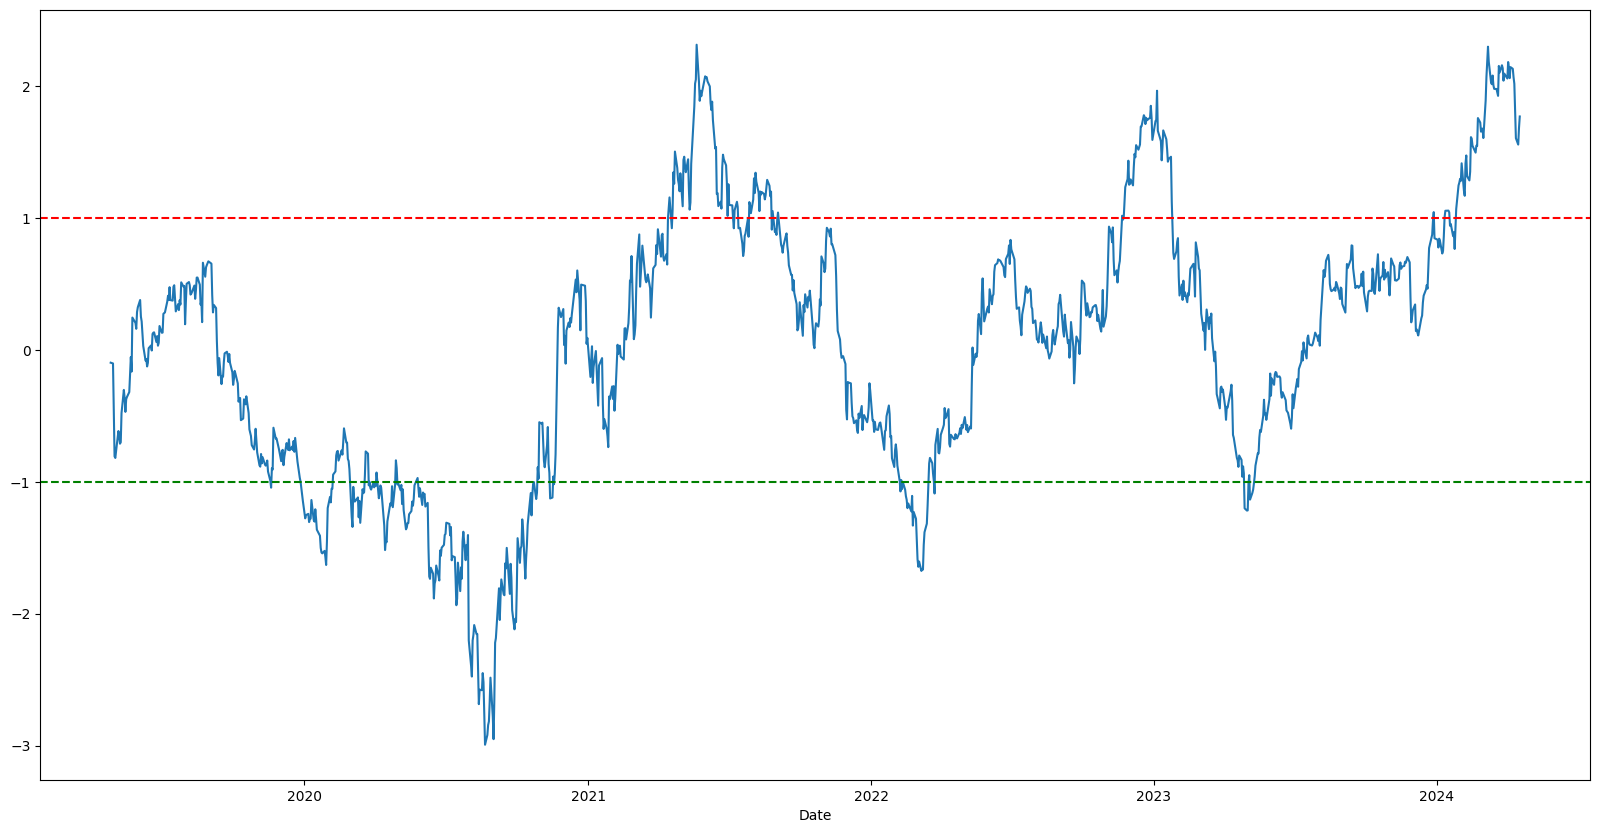

In [62]:
#plot z-scores of AAPL US Equity
plt.figure(figsize=(20, 10))
plt.plot(z_scores_df['AAPL US Equity'], label='AAPL US Equity')
plt.xlabel('Date')
#add red dashed line at 1 and green at -1
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')


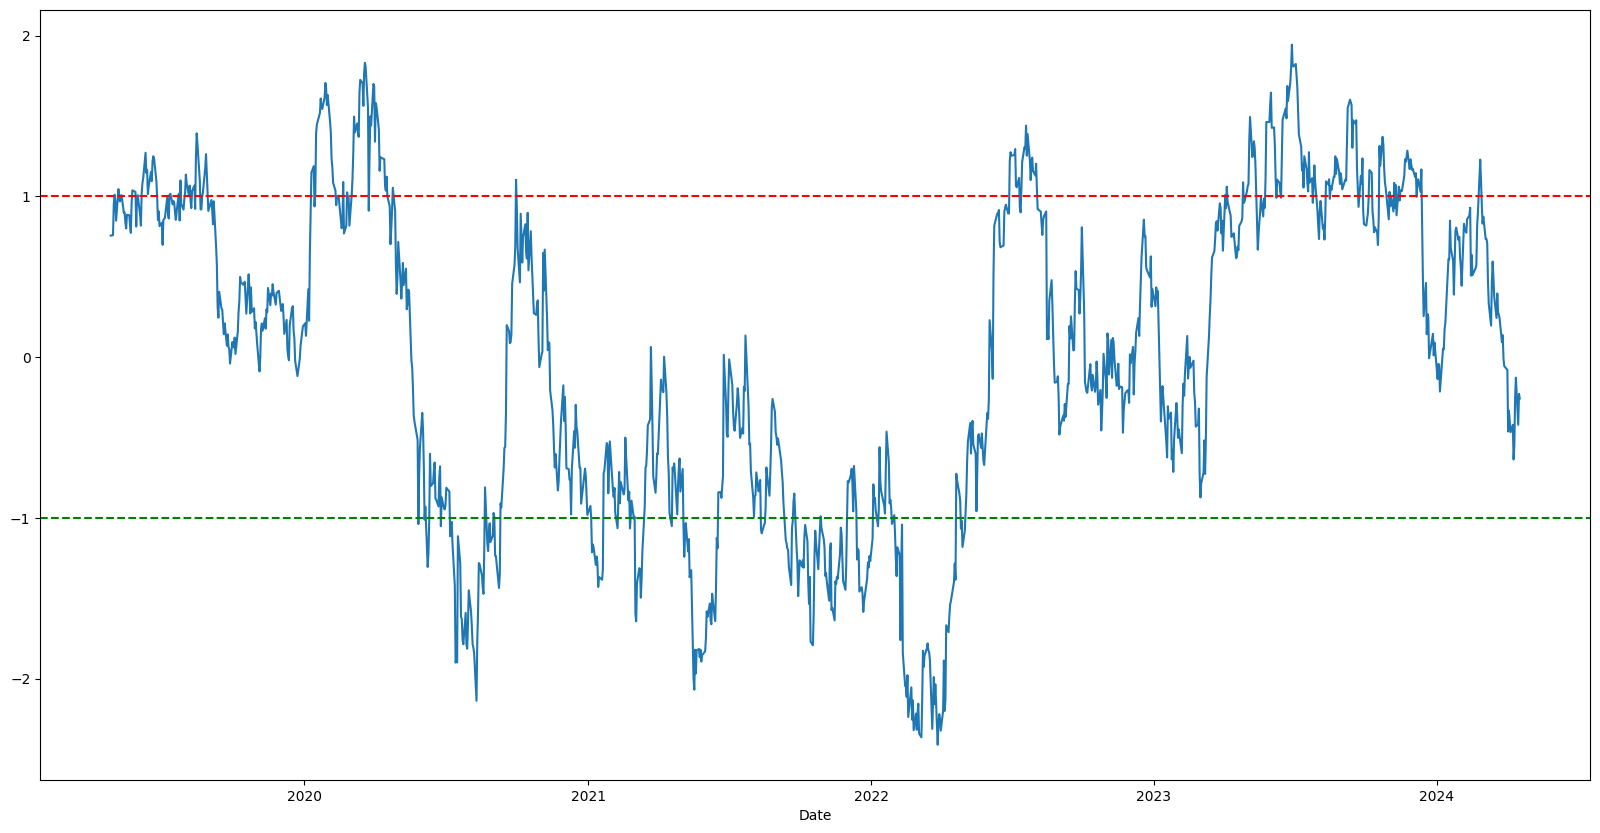

In [63]:
#plot z-scores of AA US Equity
plt.figure(figsize=(20, 10))
plt.plot(z_scores_df['AA US Equity'], label='AA US Equity')
plt.xlabel('Date')
#add red dashed line at 1 and green at -1
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')

Text(0.5, 0, 'Date')

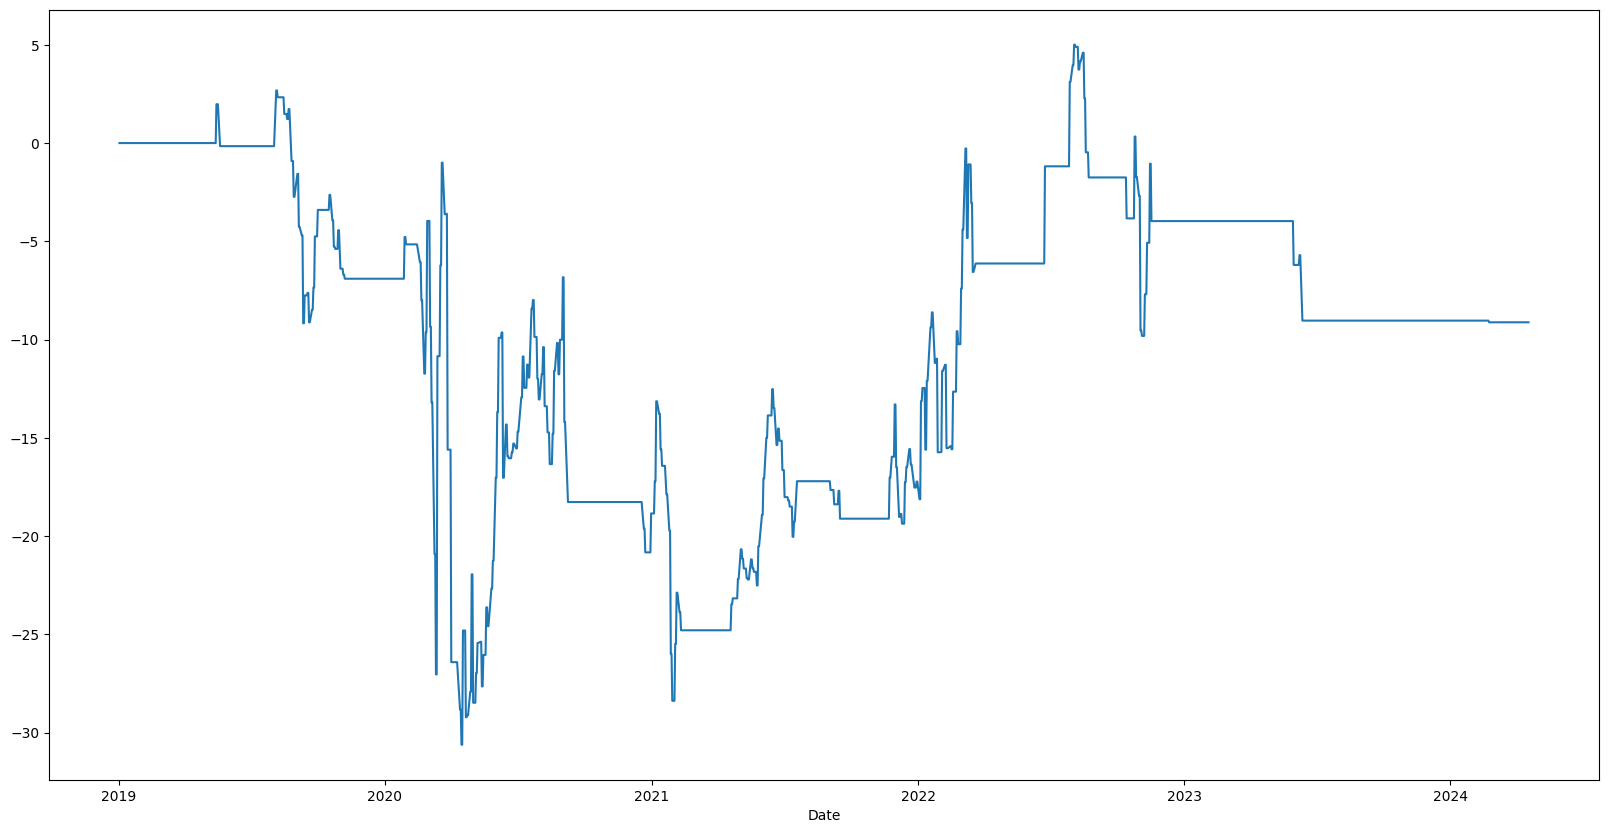

In [64]:
#plot culmative returns of AAPL US Equity
plt.figure(figsize=(20, 10))
plt.plot(cumulative_returns_df['ADSK UW Equity'], label='ADSK UW Equity')
plt.xlabel('Date')

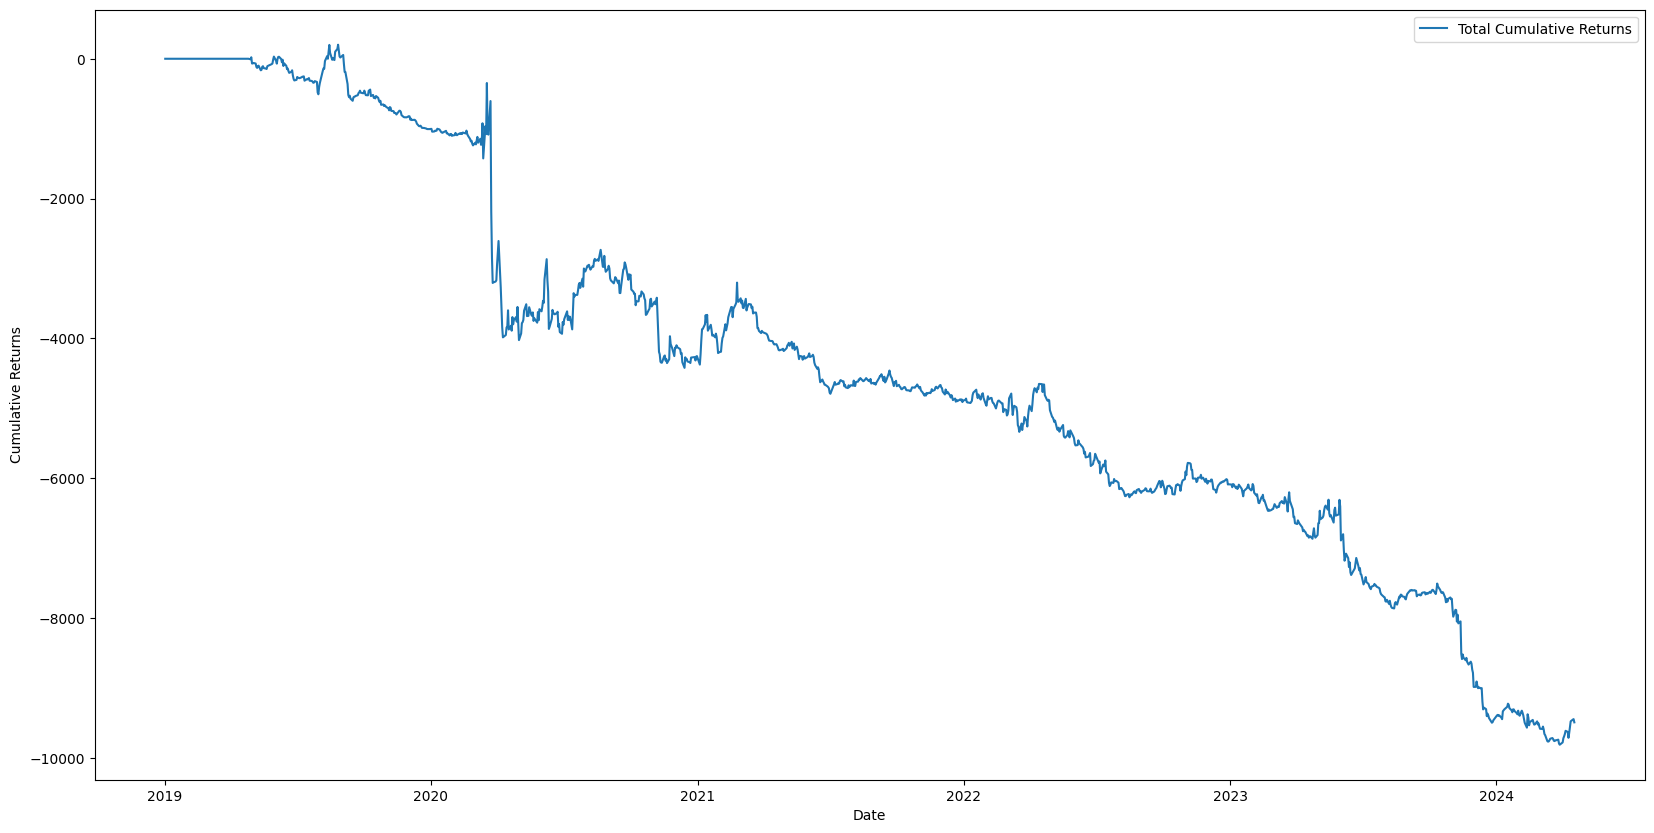

In [65]:
#plot total cumulative returns
plt.figure(figsize=(20, 10))
plt.plot(total_cumulative_returns, label='Total Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()